In [85]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import statsmodels.api as sm
from sklearn.linear_model import LinearRegression

In [86]:
%matplotlib inline

Autoregressive Distributed Lag (ARDL) Model

In [87]:
data = pd.read_csv('austria_hicp.csv')

In [88]:
data.head()

,date,hicp,d_l_M1,d_l_PKB_adj,price_exp_covid,covid_loans
0,2000Q3,2.033333,0.003312,0.005989,0.0,0.0
1,2000Q4,2.100000,0.002905,0.013387,0.0,0.0
2,2001Q1,2.000000,0.038542,-0.002465,0.0,0.0
3,2001Q2,2.700000,0.019024,-0.002405,0.0,0.0
4,2001Q3,2.533333,0.014690,0.000660,0.0,0.0


In [89]:
data.columns

Index(['date', 'hicp', 'd_l_M1', 'd_l_PKB_adj', 'price_exp_covid',
       'covid_loans'],
      dtype='object')

In [90]:
data.describe(include='all')

,date,hicp,d_l_M1,d_l_PKB_adj,price_exp_covid,covid_loans
count,93,93.000000,93.000000,93.000000,93.000000,93.000000
unique,93,NaN,NaN,NaN,NaN,NaN
top,2000Q3,NaN,NaN,NaN,NaN,NaN
freq,1,NaN,NaN,NaN,NaN,NaN
mean,NaN,2.418996,0.017840,0.003232,4.139068,0.783692
std,NaN,2.010758,0.014305,0.019280,12.500501,2.189980
min,NaN,0.200000,-0.028486,-0.119621,0.000000,0.000000
25%,NaN,1.466667,0.013321,-0.000649,0.000000,0.000000
50%,NaN,2.000000,0.019340,0.003931,0.000000,0.000000
75%,NaN,2.400000,0.023190,0.008137,0.000000,0.000000


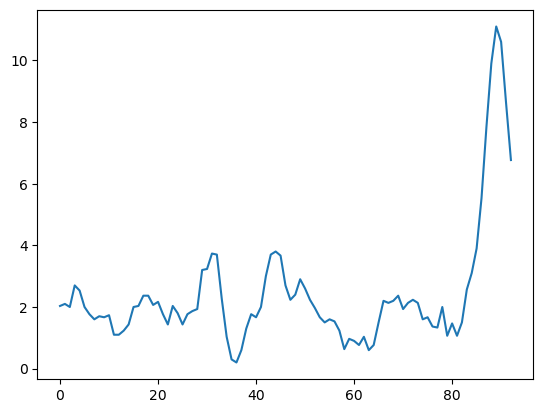

In [91]:
plt.plot(data['hicp'])
plt.show()

In [92]:
data['lag1_hicp'] = data['hicp'].shift(1)
data['lag2_hicp'] = data['hicp'].shift(2)

In [93]:
data.head()

,date,hicp,d_l_M1,d_l_PKB_adj,price_exp_covid,covid_loans,lag1_hicp,lag2_hicp
0,2000Q3,2.033333,0.003312,0.005989,0.0,0.0,NaN,NaN
1,2000Q4,2.100000,0.002905,0.013387,0.0,0.0,2.033333,NaN
2,2001Q1,2.000000,0.038542,-0.002465,0.0,0.0,2.100000,2.033333
3,2001Q2,2.700000,0.019024,-0.002405,0.0,0.0,2.000000,2.100000
4,2001Q3,2.533333,0.014690,0.000660,0.0,0.0,2.700000,2.000000


In [94]:
model_data = data.drop(data.index[:2])

predictors = model_data[['d_l_M1', 'd_l_PKB_adj', 'price_exp_covid', 'covid_loans', 'lag1_hicp', 'lag2_hicp']]
outcome = model_data['hicp']

In [97]:
model = LinearRegression()
model.fit(predictors, outcome)

print(f'Intercept: {model.intercept_:.3f}')
coefficients = model.coef_
for i, coef in enumerate(coefficients):
    print(f'Coefficient {i+1}: {coef:.3f}')

Intercept: 0.856
Coefficient 1: -11.094
Coefficient 2: 4.676
Coefficient 3: 0.063
Coefficient 4: -0.112
Coefficient 5: 1.046
Coefficient 6: -0.393
